In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset
df=pd.read_csv('climate_action_data.csv')
df.head(5)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [5]:
#Columns in the dataset
df.columns

Index(['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
       'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)',
       'Irrigation_Recommended(mm)', 'Drone_Image_ID'],
      dtype='object')

In [6]:
#Dimensions
df.shape

(913, 10)

In [7]:
# Overview of the dataset
dfc=df.copy()
dfc.info()
dfc.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


(913, 10)

In [8]:
#Correcting datatypes
#Dates
dfc['Date']=pd.to_datetime(dfc['Date'],errors='coerce')

#Numeric columns
num_cols=['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in num_cols:
    dfc[col]=pd.to_numeric(dfc[col],errors='coerce')
dfc.dtypes


Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object

In [ ]:
#Statistical summary of the data
dfc.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,909,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2026-02-05 06:23:21.980197888,44.470099,6.255639,26.404515,60.095374,87.659692,17.415419
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-20 00:00:00,26.520000,5.330000,22.100000,45.900000,58.275000,11.400000
50%,2026-02-03 00:00:00,45.185000,6.295000,26.600000,59.400000,86.300000,17.400000
75%,2026-08-28 00:00:00,62.420000,7.105000,30.600000,75.325000,117.625000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.626613,1.026400,4.931119,17.561515,34.704878,7.105890


In [10]:
dfc.shape

(913, 10)

In [11]:
# Remove extreme outliers from the DataFrame
for col in num_cols:
    q1 = dfc[col].quantile(0.25)
    q3 = dfc[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    dfc = dfc[(dfc[col] > lower_bound) & (dfc[col] < upper_bound)]

dfc.shape

(908, 10)

In [12]:
#Check for missing values
dfc.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [13]:
print(dfc.duplicated().sum())

111


In [14]:
#Check for duplicates
duplicates=dfc[dfc.duplicated()]
duplicates

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
800,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
802,SEN-1175,2025-06-25,22.21,5.42,23.4,68.4,Beans,86.5,18.3,IMG-2175
803,SEN-1735,2027-01-06,71.40,4.93,24.5,67.0,Wheat,95.5,6.2,IMG-2735
804,SEN-1242,2025-08-31,74.04,5.62,25.5,76.9,Wheat,66.9,12.9,IMG-2242
805,SEN-1764,2027-02-04,12.35,7.38,27.8,33.4,Lettuce,107.6,10.5,IMG-2764
...,...,...,...,...,...,...,...,...,...,...
908,SEN-1090,2025-04-01,18.37,7.03,21.0,47.1,Maize,94.2,8.0,IMG-2090
909,SEN-1201,2025-07-21,15.89,6.40,30.5,33.3,Tomatoes,108.3,14.5,IMG-2201
910,SEN-1309,2025-11-06,28.96,5.04,20.5,47.6,Tomatoes,81.1,12.7,IMG-2309
911,SEN-1339,2025-12-06,16.85,6.57,19.3,34.5,Beans,48.5,12.7,IMG-2339


In [15]:
#Handling nulls (date and crop type)
dfc.dropna(inplace=True)
dfc.shape

(900, 10)

In [16]:
#Dropping duplicates
dfc.drop_duplicates(inplace=True)
dfc.shape

(789, 10)

In [17]:
#Checking the dataset
# dfc.isnull().sum()
# dfc.shape
# print(dfc.duplicated().sum())
dfc.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,789,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,2026-02-05 13:12:05.475284992,44.774563,6.246946,26.469962,60.084791,87.304816,17.401521
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-20 00:00:00,26.940000,5.320000,22.300000,46.000000,57.100000,11.200000
50%,2026-02-06 00:00:00,45.370000,6.250000,26.600000,59.800000,85.300000,17.400000
75%,2026-08-25 00:00:00,62.740000,7.080000,30.600000,75.300000,117.700000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.503773,1.024433,4.872233,17.466630,34.966482,7.171804


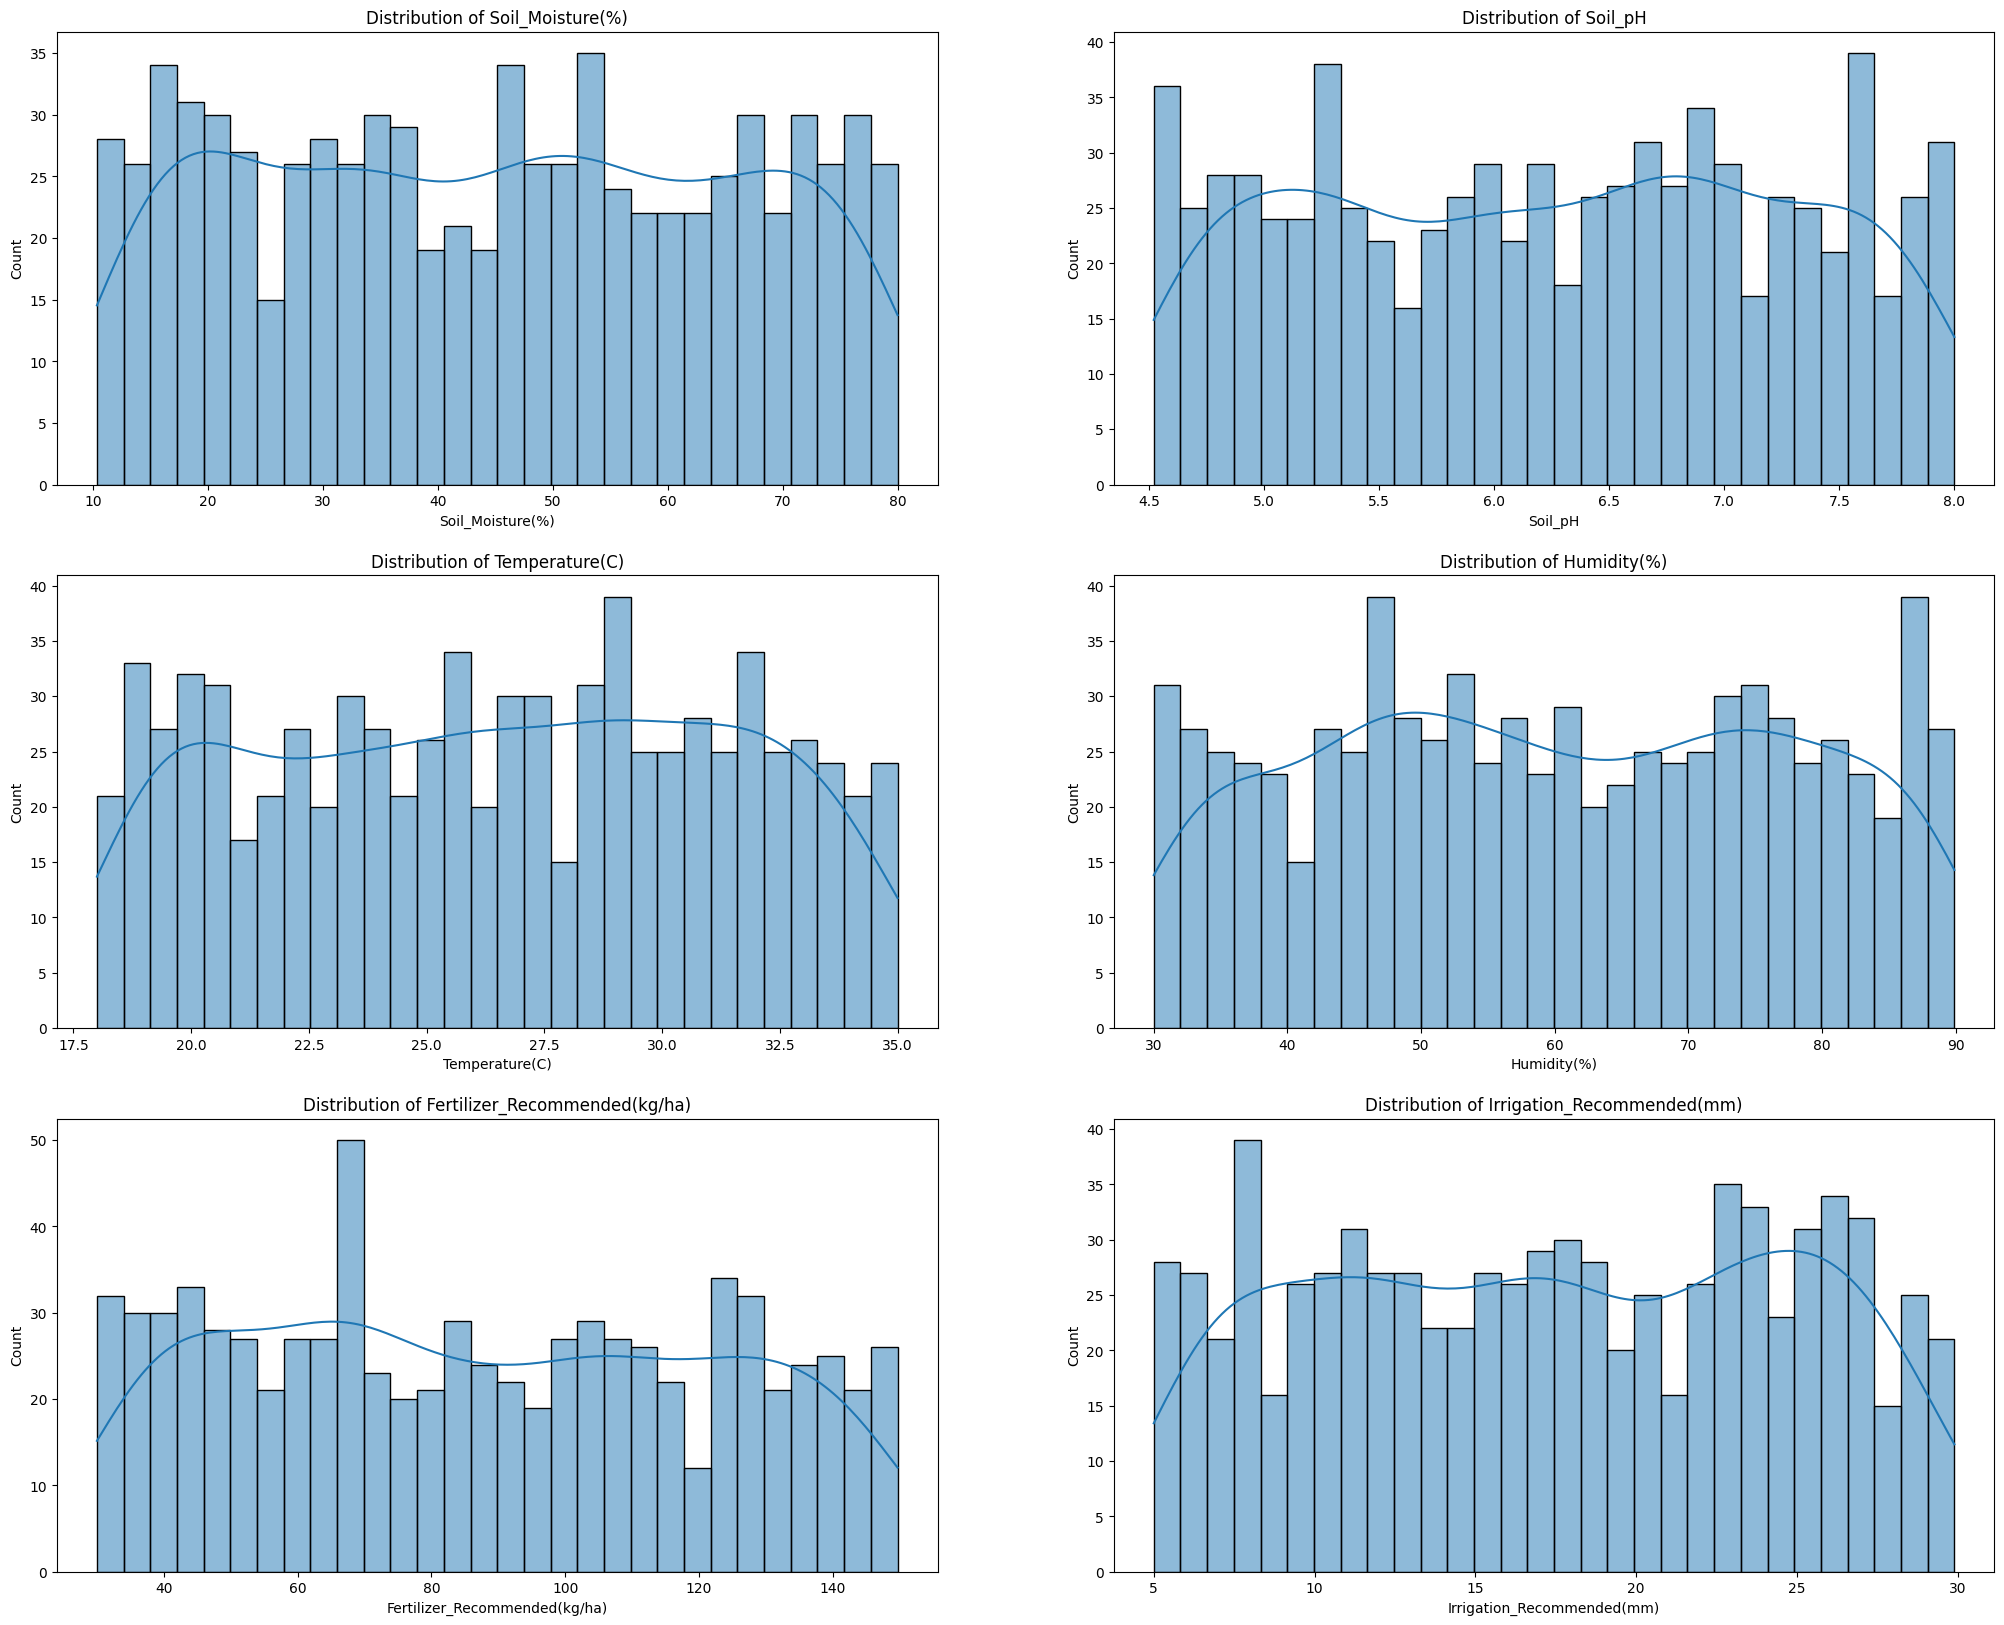

In [18]:
#Visualization
plt.figure(figsize = (25,20))

#All the numeric columns
for i,col in enumerate(num_cols,1):
    plt.subplot(3,2,i)
    sns.histplot(dfc[col],bins=30,kde=True)
    plt.title(f"Distribution of {col}")

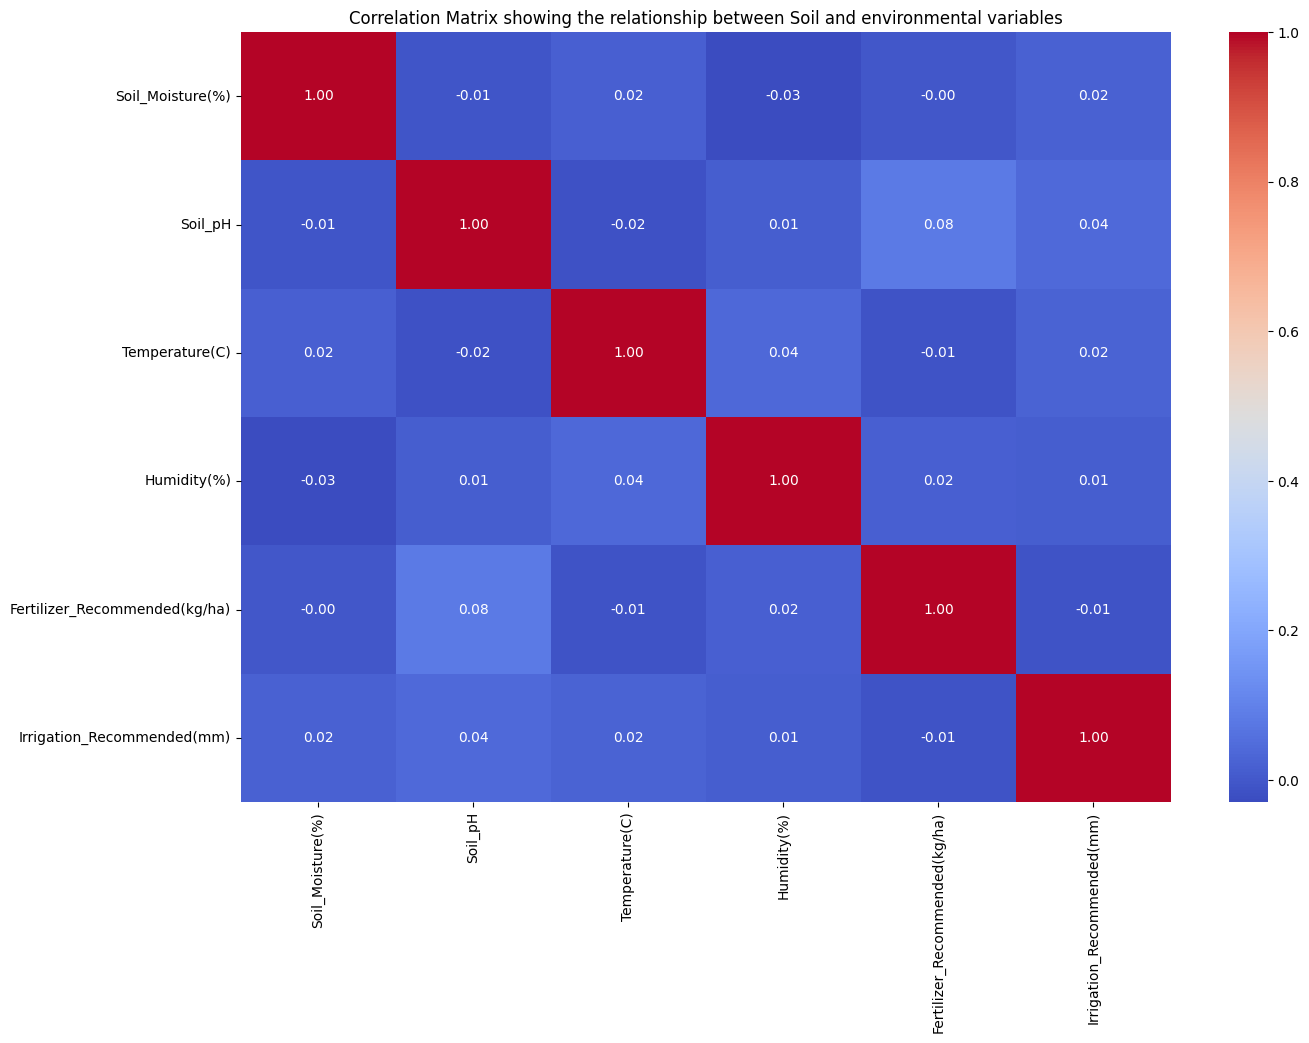

In [19]:
corr_matrix = dfc.corr(numeric_only=True)

plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix showing the relationship between Soil and environmental variables')
plt.show()


In [ ]:
£

In [20]:
#Crop with the highest average soil moisture
crop_by_moisture=dfc.groupby('Crop_Type')["Soil_Moisture(%)"].mean().sort_values(ascending=False)
crop_by_moisture.head(1)

Crop_Type
Wheat    47.195731
Name: Soil_Moisture(%), dtype: float64

In [21]:
#Irrigation adjustments for crops experiencing temperature above 30
crops_by_avtemp=dfc.groupby('Crop_Type')["Temperature(C)"].mean().sort_values(ascending=False)
print(crops_by_avtemp[crops_by_avtemp<30])

Crop_Type
Maize       27.012987
Beans       26.900667
Tomatoes    26.210909
Lettuce     26.152349
Wheat       26.129825
Name: Temperature(C), dtype: float64
